## TrpR_IAA

Exemplary design of the trpytophane repressor (PDB: 1ZT9) with the ligand indole-3-acetic acid (IAA).

In [1]:
# This is a comment. It's marked by a leading "#" symbol

# Import OS and system libraries
import sys
import os
import logging

# Append the pocketoptimizer code to your $PYTHONPATH
cwd = os.getcwd()
po_dir = os.path.abspath(os.path.join(cwd, '..'))
project_dir = os.path.join(cwd, 'TrpR_IAA')
if not po_dir in sys.path:
    sys.path.insert(0, po_dir)

# Import Pocketoptimizer
import pocketoptimizer as po

# Remove most warnings, only show Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
# Initialize a new design pipeline
design = po.DesignPipeline(work_dir=project_dir,         # Path to working directory containing scaffold and ligand subdirectory
                           ph=7,                         # pH used for protein and ligand protonation
                           forcefield='amber_ff14SB',    # forcefield used for all energy computations (Use Amber as it is better tested!)
                           intra=False,                  # Whether to score intramolecular energies or not (Experimental, should be turned off!)
                           ncpus=8)                      # Number of CPUs for multiprocessing

2023-01-13 15:41:30,412 - pocketoptimizer.ui - INFO - Logging to: /agh/projects/jakob/PycharmProjects/PocketOptimizer2/docs/tutorials/TrpR_IAA/pocketoptimizer.log


### From now on you are inside the directory of your design!

In [3]:
# Prepare ligand
design.parameterize_ligand(input_ligand='ligand/IAA.sdf',  # Input ligand structure file could be .mol2/.sdf
                           addHs=True                      # Whether to add hydrogen atoms to the input structure
                           )

2023-01-13 15:41:31,781 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-01-13 15:41:31,781 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
2023-01-13 15:41:33,650 - root - WARNING - Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.
2023-01-13 15:41:35,535 - pocketoptimizer.preparation.structure_building - INFO - Adding hydrogen atoms to the ligand according to pH: 7.
2023-01-13 15:41:36,401 - pocketoptimizer.preparation.structure_building - INFO - Parameterize ligand for GAFF2.
2023-01-13 15:41:36

In [4]:
design.prepare_protein(
    protein_structure='scaffold/1ZT9.pdb',  # Input PDB
    keep_chains=['A', 'B'],  # Specific protein chains to keep
    backbone_restraint=True, # Restrains the backbone during the minimization
    cuda=False,               # Performs minimization on CPU instead of GPU
    discard_mols=[{'chain': 'A', 'resid': '1001'}]     # Special molecules to exclude. Per default everything, but peptides have to be defined manually
    )

2023-01-13 15:41:36,961 - pocketoptimizer.ui - INFO - Start Protein Preparation.
2023-01-13 15:41:37,198 - pocketoptimizer.preparation.structure_building - INFO - Protonate protein according to pH: 7.
2023-01-13 15:41:38,067 - moleculekit.tools.preparation - WARNING - Both chains and segments are defined in Molecule.chain / Molecule.segid, however they are inconsistent. Protein preparation will use the chain information.



---- Molecule chain report ----
Chain A:
    First residue: SER     5  
    Final residue: LEU   105  
Chain B:
    First residue: SER     5  
    Final residue: TRP   901  
---- End of chain report ----



2023-01-13 15:41:40,028 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 A to HID
2023-01-13 15:41:40,029 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 A to HID
2023-01-13 15:41:40,030 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 B to HID
2023-01-13 15:41:40,030 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 B to HID
2023-01-13 15:41:40,032 - moleculekit.tools.preparation - WARNING - Dubious protonation state: the pKa of 2 residues is within 1.0 units of pH 7.0.
2023-01-13 15:41:40,033 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 A (pKa= 6.16)
2023-01-13 15:41:40,033 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 B (pKa= 6.24)
2023-01-13 15:41:41,403 - pocketoptimizer.preparation.structure_building - INFO - Successfully prepared protein structure.
2023-01-13 15:41:41,406 - pocketoptimizer.ui - INFO - Building complex.
2023-01-1

In [5]:
design.prepare_lig_conformers(
    nconfs=50,         # Maximum number of conformers to produce (Sometimes these methods produce lower number of conformations)
    method='genetic',  # Genetic method in OpenBabel, other option is confab
    score='rmsd',      # Filters conformers based on RMSD
    )

2023-01-13 15:42:38,172 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Starting ligand conformer generation using obabel.
2023-01-13 15:42:38,173 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Selected Method: genetic.
2023-01-13 15:42:38,798 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Generated 50 conformers.
2023-01-13 15:42:38,800 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Conformer sampling was successful.


In [6]:
# Your mutations
design.set_mutations([{'mutations': ['LEU', 'THR'], 'resid': '88', 'chain': 'B'}, 
                      {'mutations': ['ARG'], 'resid': '84', 'chain': 'B'}, 
                      {'mutations': ['LEU','THR'], 'resid': '44', 'chain': 'A'}]
)

2023-01-13 15:42:40,845 - pocketoptimizer.ui - INFO - If design positions are removed or added a new design run should be started.


In [7]:
# Prepares all defined mutants and glycine scaffolds for side chain rotamer and ligand pose sampling
design.prepare_mutants(sampling_pocket='GLY')

2023-01-13 15:42:43,142 - pocketoptimizer.ui - INFO - Start building mutated protein scaffold variants.
2023-01-13 15:42:43,145 - pocketoptimizer.ui - INFO - Build GLY sampling pockets.
2023-01-13 15:42:43,671 - pocketoptimizer.preparation.structure_building - INFO - Build ligand sampling pocket.
2023-01-13 15:42:44,171 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2023-01-13 15:42:44,386 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2023-01-13 15:42:44,722 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2023-01-13 15:42:46,236 - pocketoptimizer.preparation.structure_building - INFO - Build mutation: A_44_LEU.
2023-01-13 15:42:46,855 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2023-01-13 15:42:47,025 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2023-01-13 15:42:47,412 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2023-01-13 15:42:48,939 - 

In [8]:
# Sampling of side chain rotamers
design.sample_sidechain_rotamers(
    vdw_filter_thresh=100,         # Energy threshold of 100 kcal/mol for filtering rotamers
    library='dunbrack',            # Use dunbrack rotamer library (Should be used!)
    dunbrack_filter_thresh=0.001,  # Probability threshold for filtering rotamers (0.1%)
    accurate=False,                # Increases the number of rotamers sampled when using dunbrack (Be careful about the computation time!)
    include_native=True            # Include the native rotamers from the minimized structure
)

2023-01-13 15:43:31,354 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Start rotamer sampling procedure using FFEvaluate.
2023-01-13 15:43:31,355 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Using 8 CPU's for multiprocessing.
2023-01-13 15:43:32,045 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_LEU not sampled yet.


A_44_LEU:   0%|          | 0/64 [00:00<?, ?it/s]

2023-01-13 15:43:50,730 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 27/64 rotamers within energy threshold of 100 kcal/mol for LEU at position: A_44.
2023-01-13 15:43:50,749 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_THR not sampled yet.


A_44_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2023-01-13 15:44:01,141 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 7/10 rotamers within energy threshold of 100 kcal/mol for THR at position: A_44.
2023-01-13 15:44:01,152 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_84_ARG not sampled yet.


B_84_ARG:   0%|          | 0/343 [00:00<?, ?it/s]

2023-01-13 15:45:06,311 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 336/343 rotamers within energy threshold of 100 kcal/mol for ARG at position: B_84.
2023-01-13 15:45:06,357 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_LEU not sampled yet.


B_88_LEU:   0%|          | 0/55 [00:00<?, ?it/s]

2023-01-13 15:45:24,144 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 26/55 rotamers within energy threshold of 100 kcal/mol for LEU at position: B_88.
2023-01-13 15:45:24,157 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_THR not sampled yet.


B_88_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2023-01-13 15:45:34,856 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 7/10 rotamers within energy threshold of 100 kcal/mol for THR at position: B_88.
2023-01-13 15:45:34,874 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamer sampling procedure is finished.


In [9]:
# Sampling of ligand poses
# Defines a grid in which the ligand is translated and rotated along.
#                       Range, Steps
sample_grid = {'trans': [1, 0.5],  # Angstrom
               'rot': [20, 20]}    # Degree
design.sample_lig_poses(
    method='grid',         #  Uses the grid method. Other option is random
    grid=sample_grid,      #  Defined grid for sampling    
    vdw_filter_thresh=100, #  Energy threshold of 100 kcal/mol for filtering ligand poses
    max_poses=10000        #  Maximum number of poses
)

2023-01-13 15:45:35,681 - pocketoptimizer.ui - INFO - Sample ligand poses.
2023-01-13 15:45:35,683 - pocketoptimizer.sampling.ligand_poses - INFO - Start ligand pose sampling procedure.
2023-01-13 15:45:36,971 - pocketoptimizer.sampling.ligand_poses - INFO - Generate possible poses within the defined grid.


Ligand Conformers:   0%|          | 0/51 [00:00<?, ?it/s]

2023-01-13 15:45:37,048 - pocketoptimizer.sampling.ligand_poses - INFO - Created possible 4641 poses.
2023-01-13 15:45:37,049 - pocketoptimizer.sampling.ligand_poses - INFO - Start filtering poses.
2023-01-13 15:45:37,050 - pocketoptimizer.sampling.ligand_poses - INFO - Using 8 CPUs for multiprocessing.


Filter Poses:   0%|          | 0/4641 [00:00<?, ?it/s]

2023-01-13 15:56:30,384 - pocketoptimizer.sampling.ligand_poses - INFO - Calculated 811 poses within energy threshold of 100 kcal/mol.
2023-01-13 15:56:30,453 - pocketoptimizer.sampling.ligand_poses - INFO - Pose sampling procedure was successful.


In [10]:
design.calculate_energies(
    scoring='vina',           #  Method to score protein-ligand interaction
)

2023-01-13 15:56:30,581 - pocketoptimizer.ui - INFO - Start energy calculations.
2023-01-13 15:56:30,582 - pocketoptimizer.ui - INFO - Using 8 CPUs for multiprocessing.
2023-01-13 15:56:30,583 - pocketoptimizer.ui - INFO - Calculate Sidechain-Scaffold Energies.
2023-01-13 15:56:30,584 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2023-01-13 15:56:30,664 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_LEU not computed yet.


  0%|          | 0/27 [00:00<?, ?it/s]

2023-01-13 15:56:39,511 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_THR not computed yet.


  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-13 15:56:48,002 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_84_ARG not computed yet.


  0%|          | 0/336 [00:00<?, ?it/s]

2023-01-13 15:57:05,827 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_LEU not computed yet.


  0%|          | 0/26 [00:00<?, ?it/s]

2023-01-13 15:57:14,488 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_THR not computed yet.


  0%|          | 0/7 [00:00<?, ?it/s]

2023-01-13 15:57:22,494 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self calculation was successful.
2023-01-13 15:57:22,496 - pocketoptimizer.ui - INFO - Calculate Sidechain-Pair Energies.
2023-01-13 15:57:22,497 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2023-01-13 15:57:23,114 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_84_ARG not computed yet.


  0%|          | 0/9072 [00:00<?, ?it/s]

2023-01-13 15:57:35,301 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_84_ARG not computed yet.


  0%|          | 0/2352 [00:00<?, ?it/s]

2023-01-13 15:57:44,269 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_LEU not computed yet.


  0%|          | 0/702 [00:00<?, ?it/s]

2023-01-13 15:57:52,491 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_THR not computed yet.


  0%|          | 0/189 [00:00<?, ?it/s]

2023-01-13 15:58:00,468 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_LEU not computed yet.


  0%|          | 0/182 [00:00<?, ?it/s]

2023-01-13 15:58:08,728 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_THR not computed yet.


  0%|          | 0/49 [00:00<?, ?it/s]

2023-01-13 15:58:17,385 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_LEU not computed yet.


  0%|          | 0/8736 [00:00<?, ?it/s]

2023-01-13 15:58:29,857 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_THR not computed yet.


  0%|          | 0/2352 [00:00<?, ?it/s]

2023-01-13 15:58:38,704 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Pair calculation was successful.
2023-01-13 15:58:38,706 - pocketoptimizer.ui - INFO - Calculate Ligand-Scaffold/Sidechain-Interaction-Energies.
2023-01-13 15:58:38,737 - pocketoptimizer.scoring.smina_scorer - INFO - Score ligand interactions using vina.
2023-01-13 15:58:39,648 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Scaffold/Self interaction energy not computed yet.
2023-01-13 15:58:39,649 - pocketoptimizer.scoring.smina_scorer - INFO - Prepare fixed scaffold.


Ligand/Scaffold:   0%|          | 0/1 [00:00<?, ?it/s]

2023-01-13 15:58:45,129 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_LEU not computed yet.
2023-01-13 15:58:45,261 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_LEU.


Ligand/A_44_LEU:   0%|          | 0/27 [00:00<?, ?it/s]

2023-01-13 15:59:04,495 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_THR not computed yet.
2023-01-13 15:59:04,540 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_THR.


Ligand/A_44_THR:   0%|          | 0/7 [00:00<?, ?it/s]

2023-01-13 15:59:09,485 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_84_ARG not computed yet.
2023-01-13 15:59:10,309 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_84_ARG.


Ligand/B_84_ARG:   0%|          | 0/336 [00:00<?, ?it/s]

2023-01-13 16:03:06,775 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_LEU not computed yet.
2023-01-13 16:03:06,900 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_LEU.


Ligand/B_88_LEU:   0%|          | 0/26 [00:00<?, ?it/s]

2023-01-13 16:03:24,949 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_THR not computed yet.
2023-01-13 16:03:24,993 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_THR.


Ligand/B_88_THR:   0%|          | 0/7 [00:00<?, ?it/s]

2023-01-13 16:03:30,050 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand scoring was successful.
2023-01-13 16:03:30,052 - pocketoptimizer.ui - INFO - Energy calculation was successful.


2023-01-13 16:05:33,401 - pocketoptimizer.solving.sontag_solver - INFO - Calculating Solutions.


Solutions:   0%|          | 0/10 [00:00<?, ?it/s]

2023-01-13 16:05:40,331 - pocketoptimizer.ui - INFO - Parse calculated solutions.
2023-01-13 16:05:40,647 - pocketoptimizer.ui - INFO - Read 10 solution(s) from solver output.
2023-01-13 16:05:43,638 - pocketoptimizer.ui - INFO - Write text report.
2023-01-13 16:05:43,680 - pocketoptimizer.ui - INFO - Wrote solution report text file(s).
2023-01-13 16:05:43,683 - pocketoptimizer.ui - INFO - Wrote summary text file.
2023-01-13 16:05:43,684 - pocketoptimizer.ui - INFO - Write html report.
2023-01-13 16:05:43,765 - pocketoptimizer.ui - INFO - Wrote solution report html file(s).
2023-01-13 16:05:43,766 - pocketoptimizer.design.html_reporter - INFO - Create energy plot.
2023-01-13 16:05:44,202 - pocketoptimizer.design.html_reporter - INFO - Create sequence logo for mutable positions.


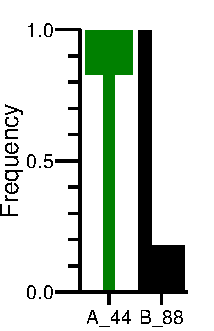

2023-01-13 16:05:44,661 - pocketoptimizer.ui - INFO - Wrote summary html file.
2023-01-13 16:05:44,662 - pocketoptimizer.ui - INFO - Creating design structure files.
2023-01-13 16:05:44,663 - pocketoptimizer.ui - INFO - Create Structures.
2023-01-13 16:05:53,231 - pocketoptimizer.ui - INFO - Creating PyMol scripts.
2023-01-13 16:05:53,254 - pocketoptimizer.ui - INFO - 10 best design solution(s) for design with forcefield: amber_ff14SB, scoring method: vina and ligand scaling: 20 identified.


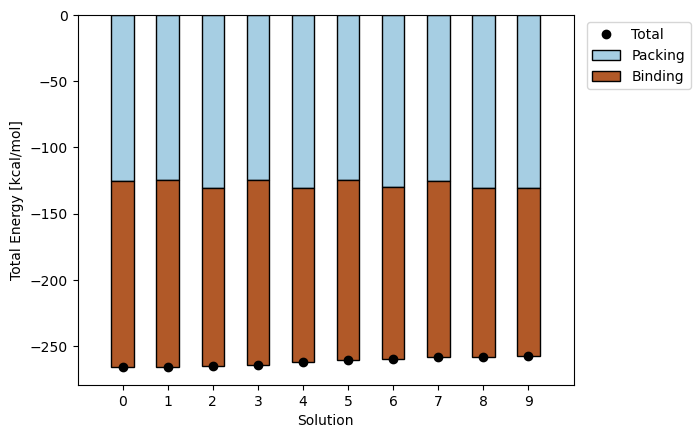

In [13]:
# Compute the lowest energy structures using linear programming
design.design(
    num_solutions=10,           #  Number of solutions to compute
    ligand_scaling=20,          #  Scaling factor for binding-related energies (You need to adapt this to approximate the packing and binding energies)
)

In [3]:
# Do not run this unless you want to fully clean your working directory from all created files and folders!
design.clean(scaffold=True, ligand=True)

2023-01-13 15:41:23,278 - pocketoptimizer.ui - INFO - All scaffold files were deleted.
2023-01-13 15:41:23,302 - pocketoptimizer.ui - INFO - All ligand files were deleted.
2023-01-13 15:41:23,304 - pocketoptimizer.ui - INFO - Logfile was deleted.
